In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
raw_csv_data = np.loadtxt('Audiobooks_data.csv', delimiter=',')

# Assuming the first column is the ID and the last column is the target
# Adjust columns as needed if your data has a different structure
data = pd.DataFrame(raw_csv_data, columns=['ID', 'Book_length_overall', 'Book_length_avg', 'Price_overall', 'Price_avg', 'Review', 'Review_10_10', 'Completion', 'Minutes_listened', 'Support_Requests', 'Last_visited_minus_Purchase_date', 'Targets'])

data.head()

,ID,Book_length_overall,Book_length_avg,Price_overall,Price_avg,Review,Review_10_10,Completion,Minutes_listened,Support_Requests,Last_visited_minus_Purchase_date,Targets
0,994.0,1620.0,1620.0,19.73,19.73,1.0,10.00,0.99,1603.8,5.0,92.0,0.0
1,1143.0,2160.0,2160.0,5.33,5.33,0.0,8.91,0.00,0.0,0.0,0.0,0.0
2,2059.0,2160.0,2160.0,5.33,5.33,0.0,8.91,0.00,0.0,0.0,388.0,0.0
3,2882.0,1620.0,1620.0,5.96,5.96,0.0,8.91,0.42,680.4,1.0,129.0,0.0
4,3342.0,2160.0,2160.0,5.33,5.33,0.0,8.91,0.22,475.2,0.0,361.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14084 entries, 0 to 14083
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                14084 non-null  float64
 1   Book_length_overall               14084 non-null  float64
 2   Book_length_avg                   14084 non-null  float64
 3   Price_overall                     14084 non-null  float64
 4   Price_avg                         14084 non-null  float64
 5   Review                            14084 non-null  float64
 6   Review_10_10                      14084 non-null  float64
 7   Completion                        14084 non-null  float64
 8   Minutes_listened                  14084 non-null  float64
 9   Support_Requests                  14084 non-null  float64
 10  Last_visited_minus_Purchase_date  14084 non-null  float64
 11  Targets                           14084 non-null  float64
dtypes: f

In [4]:
data.describe()

,ID,Book_length_overall,Book_length_avg,Price_overall,Price_avg,Review,Review_10_10,Completion,Minutes_listened,Support_Requests,Last_visited_minus_Purchase_date,Targets
count,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000
mean,16772.491551,1591.281685,1678.608634,7.103791,7.543805,0.160750,8.909795,0.125659,189.888983,0.070222,61.935033,0.158833
std,9691.807248,504.340663,654.838599,4.931673,5.560129,0.367313,0.643406,0.241206,371.084010,0.472157,88.207634,0.365533
min,2.000000,216.000000,216.000000,3.860000,3.860000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8368.000000,1188.000000,1188.000000,5.330000,5.330000,0.000000,8.910000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16711.500000,1620.000000,1620.000000,5.950000,6.070000,0.000000,8.910000,0.000000,0.000000,0.000000,11.000000,0.000000
75%,25187.250000,2160.000000,2160.000000,8.000000,8.000000,0.000000,8.910000,0.130000,194.400000,0.000000,105.000000,0.000000
max,33683.000000,2160.000000,7020.000000,130.940000,130.940000,1.000000,10.000000,1.000000,2160.000000,30.000000,464.000000,1.000000


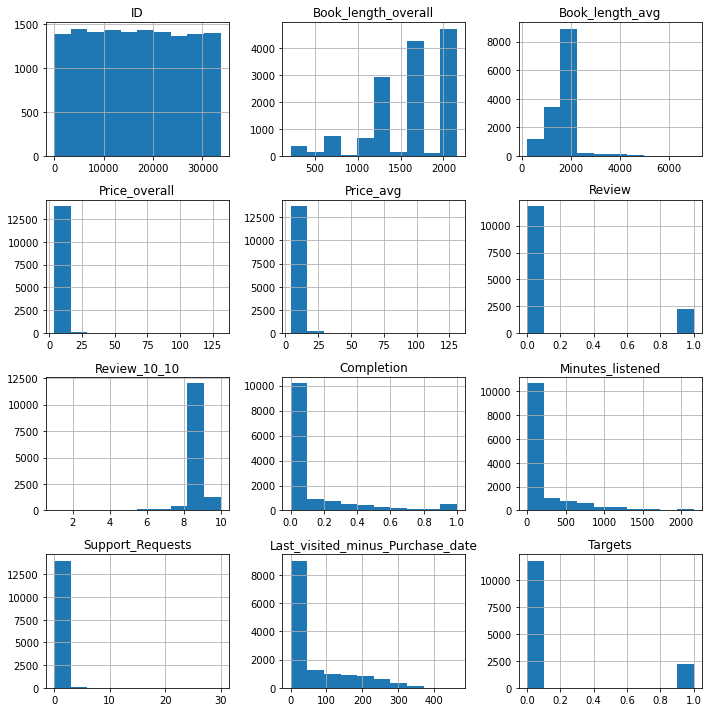

In [5]:
# Distribution plots for numerical variables
data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

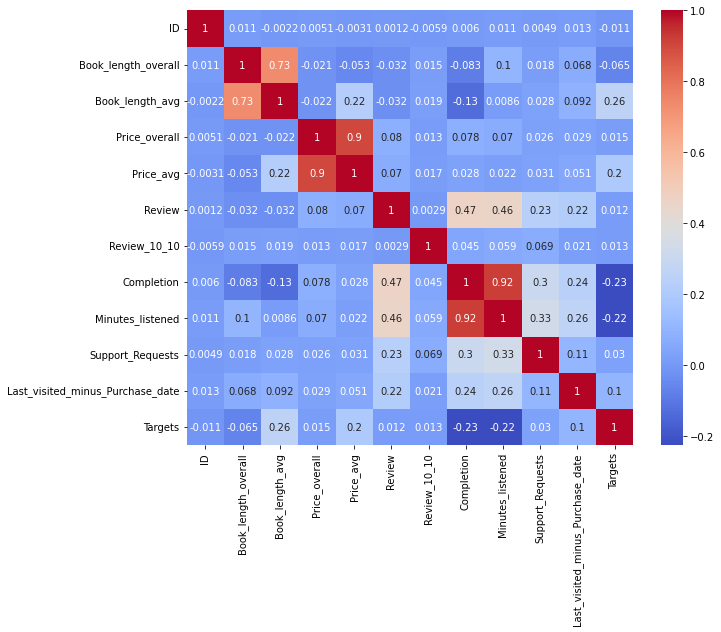

In [6]:
# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

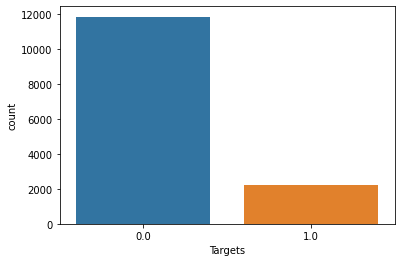

In [7]:
# Target variable distribution
sns.countplot(x='Targets', data=data)
plt.show()

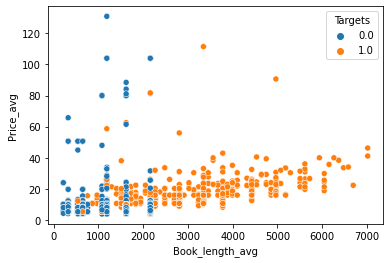

In [8]:
# Scatter plot of Book_length_avg vs Price_avg colored by target
sns.scatterplot(x='Book_length_avg', y='Price_avg', hue='Targets', data=data)
plt.show()

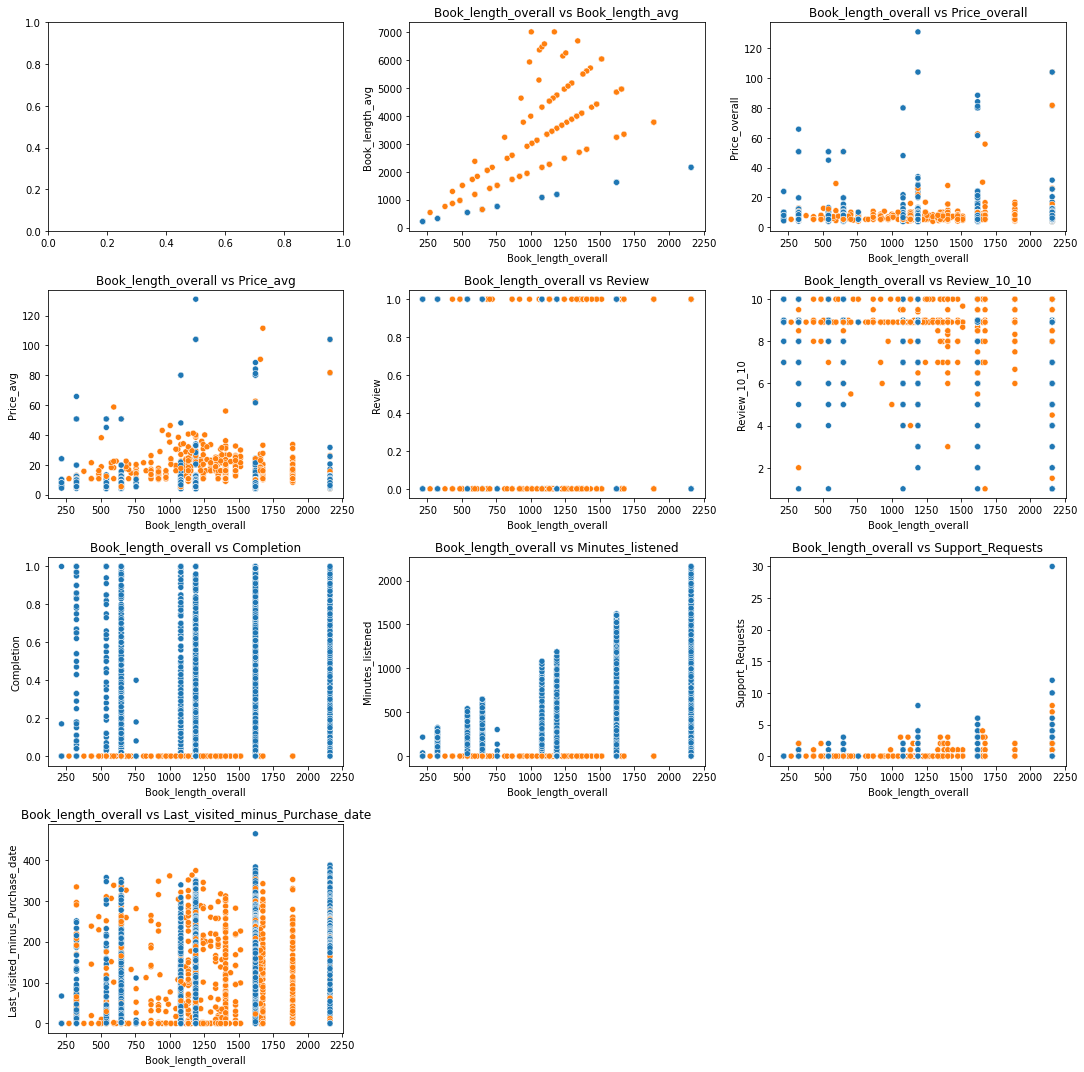

In [10]:
numerical_columns = ['Book_length_overall', 'Book_length_avg', 'Price_overall', 'Price_avg', 'Review', 'Review_10_10', 'Completion', 'Minutes_listened', 'Support_Requests', 'Last_visited_minus_Purchase_date']

num_plots = len(numerical_columns)
num_cols = 3  # Number of columns
num_rows = (num_plots - 1) // num_cols + 1  # Number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for idx, (column_x, column_y) in enumerate([(x, y) for x in numerical_columns for y in numerical_columns]):
    if column_x != column_y and idx < num_plots:
        ax = axes[idx // num_cols, idx % num_cols]
        sns.scatterplot(x=column_x, y=column_y, hue='Targets', data=data, ax=ax)
        ax.set_title(f'{column_x} vs {column_y}')
        ax.legend().set_visible(False)

# Remove any empty subplots
for idx in range(len(numerical_columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout()
plt.show()